*Supporting textbook chapters for week 1: 2, 3 and 4.3*

# Example 1

Suppose the problem is to find the number of radioactive atoms of uranium $N$ as a function of time given initial $N_0$ and
$$\frac{dN}{dt} = -\frac{N}{\tau}.$$
($\tau =$ decay constant), using numerical integration, for a duration of $5\tau$.

## Part (a) 
Write pseudocode for the solution, such that we end up with an array of values of time $t$ (between 0 and $N_0$) and an array of values of $N(t)$

Answer:

1. Define $\tau$ and dt (small value)
2. Define initial $N_0$ constant
3. Define a variable N that takes the value of $N_0$
4. Create a loop until 5 tau, iterate over dt
5. Within the Loop, N is old value + -(old value)/tau times dtau

## Part (b)
Now write the actual code

In [74]:
import numpy as np

tau = 5
N_0 = 10
dt = 0.1

duration = 5 * tau

N = N_0

time_array = [0]
N_array = [N_0]


i = 0
while i < duration:

    N -= (N / tau) * dt
    i = i + dt

    N_array.append(N)
    time_array.append(i)

## Part (c)
Use the results of the previous part to make a plot of $N$ vs $t$, with the help of matplotlib.pyplot

Text(0, 0.5, 'N')

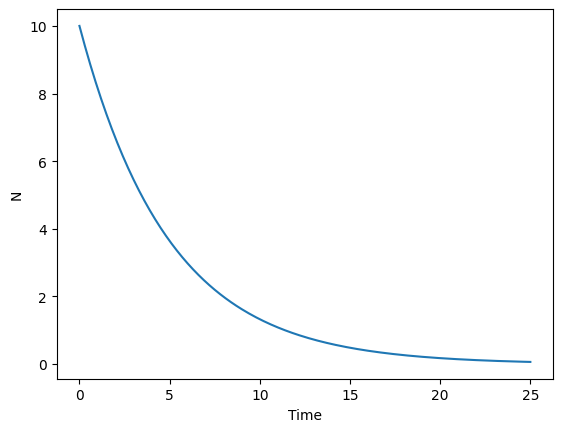

In [75]:
import matplotlib.pyplot as plt

# print(1)
plt.plot(time_array, N_array)
plt.xlabel("Time")
plt.ylabel("N")

Quick calculation to make sure this makes sense

$$\frac{dN}{dt} = -\frac{N}{\tau}$$

$$\frac{dN}{N} = -\frac{dt}{\tau}$$

$$ln(N) = -\frac{t}{\tau} + C$$

$$N = N_0e^{-\frac{t}{\tau}}$$

# Example 2

For a particle undergoing Simple Harmonic Oscillation with angular frequency 0.5 rad/s, initial position 3 m, and initial velocity 0 m/s, create a function to find its position as a function of time analytically. Then calculate the velocity and acceleration as a function of time, for 30 seconds, by taking derivatives numerically.

## Part (a)
Write the code for the analytical function

In [76]:
def SHO_position(time, amplitude, angular_frequency):
    return amplitude * np.cos(angular_frequency * time)

## Part (b)
Write the pseuudocode for a program that gives us an array of values of time $t$ (between 0 and 30s), and 3 more arrays $x(t)$, $v(t)$, and $a(t)$

1. Define all relevant variables
2. Time is just linspace, position is applying the function to the time array
3. Velocity is the [i+1] - [i]/dt value

## Part (c)
Now write the actual code for the previous part

In [77]:
amplitude = 3  # [m]
angular_frequency = 0.5  # [rad/s]
initial_velocity = 0

num_vals = 100
time_end = 30
time = np.linspace(0, time_end, num_vals)
dt = time[1] - time[0]

position = SHO_position(time, amplitude, angular_frequency)


def differentiation(array, dt):
    return_array = np.zeros(len(array) - 1)
    for i in range(len(return_array)):
        return_array[i] = (array[i + 1] - array[i]) / dt

    return return_array


velocity = differentiation(position, dt)

acceleration = differentiation(velocity, dt)

## Part (d)
Using the results of the previous part, make 3 plots: $x(t),v(t),a(t)$

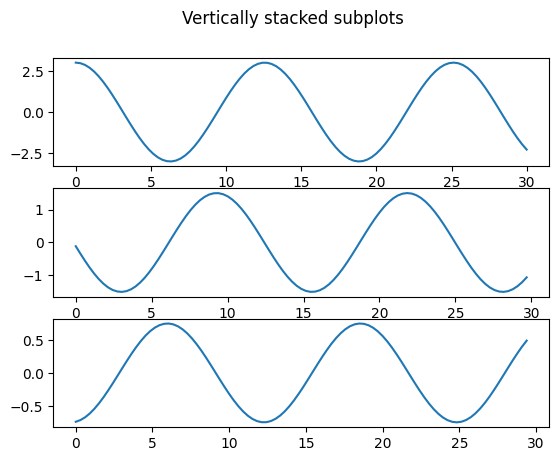

In [78]:
fig, axs = plt.subplots(3)
fig.suptitle("Vertically stacked subplots")
axs[0].plot(time, position)
axs[1].plot(time[:-1], velocity)
axs[2].plot(time[:-2], acceleration)

## Example 3

Read through Example 4.3 on pages 137-138 of the text, which  show you that to multiply two matrices of size $O(N)$ on a side takes $O(N^3)$ operations.
So multiplying matrices that are $N=1000$ on a side takes $O(10^9)$ operations (a ``GigaFLOP''). 

## Part (a)
Create two constant matrices $A$ and $B$, then time how long it takes to multiply the matrices to form a matrix $C$ (using the code fragment in the textbook), for a range of $N$ (from $N = 2$ to a few hundred). You should end up with an array of $N$ values and an array of time values. Hint: Use python's time module. 

In [79]:
import time


def multiply(N):

    A = np.ones([N, N]) * 10.2
    B = np.ones([N, N]) * 5.0
    C = np.zeros([N, N], float)

    start = time.time()
    for i in range(N):
        for j in range(N):
            for k in range(N):
                C[i, j] += A[i, k] * B[k, j]

    return time.time() - start


N_array = []
time_array = []
for N_value in range(2, 150, 2):
    time_array.append(multiply(N_value))
    N_array.append(N_value)

## Part (b)
Using the results of the previous part, plot this time as a function of $N$ and as a function of $N^3$. What do you notice?

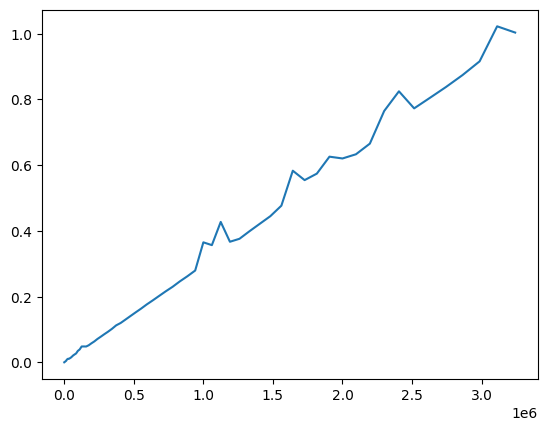

In [80]:
N_array = np.array(N_array)
# plt.plot(N_array, time_array)
plt.plot(
    N_array**3, time_array
)  # This is linear so clearly an N3 proportional time taken.

## Part (c)
Compare your time results to the time it takes numpy.dot to carry out the same operation. What do you notice?
See http://tinyurl.com/pythondot for more explanations.

In [81]:
import time


def multiply(N):

    A = np.ones([N, N]) * 10.2
    B = np.ones([N, N]) * 5.0
    # C = np.zeros([N, N], float)

    start = time.time()
    C = np.dot(A, B)

    return time.time() - start


N_array = []
time_array = []
for N_value in range(2, 150, 2):
    time_array.append(multiply(N_value))
    N_array.append(N_value)

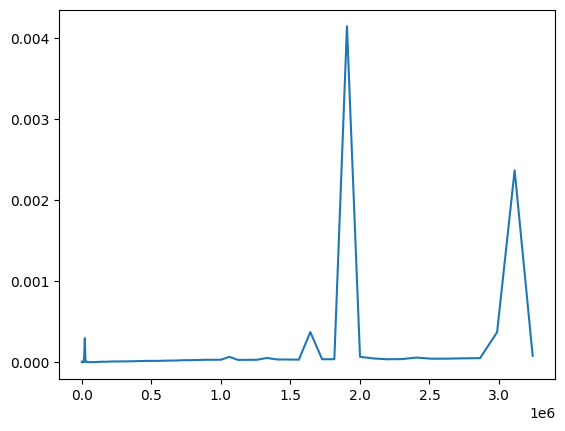

In [82]:
N_array = np.array(N_array)
plt.plot(N_array**3, time_array)  # 10000x faster

In [83]:
A = np.array([1, 2, 3, 5])
print(A)

A = np.append(A, 7)
print(A)

[1 2 3 5]
[1 2 3 5 7]
